# Notebook E-tivity 3 CE4021 Task 1

Student name: Sean Meade

Student ID: 101287921

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [8]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

## Problem Description

Write code to simulate the probabilistic experiment of observing the height of customers of a theme park to establish the mean and standard deviation.

Because  then this will be a continuous random variable. Being a continuous variable I will represent it with a normal distribution.

### The type of random variable and probability distribution

To describe this experiment I have chosen to use a continuous variable. There are no set categories here a customer can be of any height in a given range. This random variable is also univariate, meaning that it is just height we are interested in there is nothing else.

The probabilities for a continuous variable are described in intervals (e.g. probability of a person being between 120 cm and 160 cm). For this it will be described using a probability density function. More specifically it will be represented by a normal distribution which is described by two numbers. These are the mean (mu - $ \mu $) and the standard deviation (sigma - $ \sigma $). The formula that represents a normal distribution is the following:

$$  $$

### 

## expected value and standard deviation of your random variable

Any stats when searching on line for average heights are for adults. Therefore I decided to take a different approach and find the average max and min heights for theme park rides and split the difference considering the rides would have been created for the average person. There are a lot of different values but most rides seem to be around 1m for the min height 

Universal: https://www.universalorlando.com/web/en/us/plan-your-visit/hours-information/ride-height-requirements min 1.02m
Alton Towers: https://www.altontowers.com/plan-your-visit/resort-information/height-restrictions/ min 1.1m max 1.96m
Pacific Park: https://pacpark.com/standard-height-requirements-for-amusement-park-rides/ min 36 in

Might need to take a different approach for these numbers but the logic after this will be the same.

These values only need to be representative. There would be a lot to take into account otherwise. For example there would be a very wide range of height because of adults, teenagers, and children visiting the theme park. There is very little (understandably so) data on the heights of children or the age range of entering a theme park on average. I was hoping to use the average age to judge the average height but these are not a one to one relationship either.

I have just decided (for now) to treat the theme park as a kids free zone and use height data I will find online.

For now I will use 150cm as the mean and 1.2 as the standard deviation.

## Experiment

Write Python code to simulate the experiment. 

To simulate the heights of people entering the park I have decided to use a normal distribution.

In [20]:
mu, sigma = 150, 1.2
s = np.random.normal(mu, sigma, 1000000)

The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:

- The expected value (mean) of your random variable


In [21]:
calculated_mean = sum(s)/len(s)
calculated_mean

150.00082352133606

- The standard deviation of your random variable.

In [22]:
mean_s = (s - calculated_mean)
squared_diff = mean_s**2
variance = sum(squared_diff)/len(s)
std = np.sqrt(variance)
std

1.1986673148104408


- Plot the distribution found in your simulated experiment with an appropriate number of 'bins'

## outputs and graphs

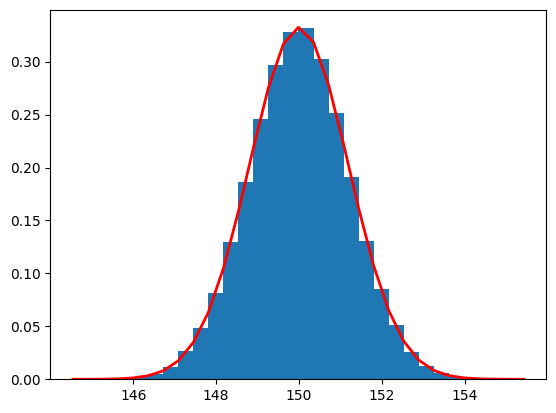

In [12]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## comparing calculated values to experimentally obtained values.

so we need to calculate manually by the formula and then use the outcome to confirm our output from function by using numpy correct?

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

Declaring the range you are choosing to experiment in the problem description like in Jason Colemans

Also from Jason that the expected value is actually different to the mean

From Peter the use of a seed while testing (and maybe also to do my calculations?)